In [1]:
#nạp dữ liệu
#Dùng pipeline 2
#Data->Standardization->Normalization->Model
import pandas as pd

# Đường dẫn đến tệp CSV
file_path = 'dulieuxettuyendaihoc.csv'

# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)

# Hiển thị một số dòng đầu của DataFrame
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [2]:
#dự báo T6 thông qua T2 T3 T4
#train/test 9/1 random state=15
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=df[['T2','T3','T4','T6']]

X=df[['T2','T3','T4']].values
y=df[['T6']].values


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=16)


In [3]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
#step: poly->log->standar->minmax->LR
steps=[('polynomial', PolynomialFeatures(include_bias=False, degree=2)),('logtransform',FunctionTransformer(np.square)),('standar',StandardScaler()),('minmaxnormalize',MinMaxScaler()),('model',LinearRegression())]

In [4]:
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('logtransform', FunctionTransformer(func=<ufunc 'square'>)),
                ('standar', StandardScaler()),
                ('minmaxnormalize', MinMaxScaler()),
                ('model', LinearRegression())])

In [5]:
model=pipe.fit(X_train,y_train)

In [6]:
#Sinh viên tự đánh giá mô hình thông qua: score, MAE, RMSE và MAPE
y_test_pred=pipe.predict(X_test)

y_train_pred=pipe.predict(X_train)


In [7]:
print('Score or R-Squared: ', model.score(X_test,y_test))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Score or R-Squared:  -0.14322401343261593
Mean Absolute Error:  1.3370619744726358
Mean Squared Error:  2.451643896806245
Root Mean Squared Error:  1.5657726197651576
Mean Absolute Percentage Error:  0.213077165210118


In [8]:
print('Score or R-Squared: ', model.score(X_train,y_train))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Score or R-Squared:  0.521616287078429
Mean Absolute Error:  0.7496812573193198
Mean Squared Error:  0.8634507095759076
Root Mean Squared Error:  0.9292204849097482
Mean Absolute Percentage Error:  0.1168871549977497


In [9]:
vT2=6.0
vT3=7.5
vT4=4.0
predicted_T6=pipe.predict([[vT2,vT3,vT4]])

print('Giá trị dự báo T6: ',predicted_T6)

Giá trị dự báo T6:  [[6.72474617]]


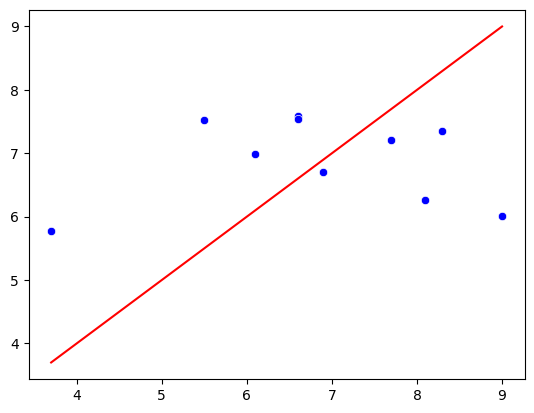

In [10]:
#vẽ Scatter test
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),markers='s',color='r')
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),markers='o',color='b')
plt.show()

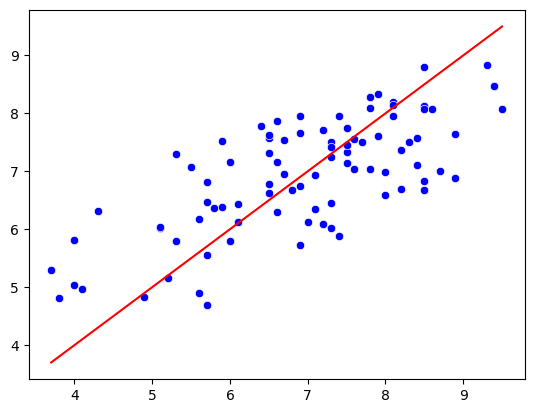

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
y_train_pred=pipe.predict(X_train)
sns.lineplot(x=y_train.flatten(),y=y_train.flatten(),markers='s',color='r')
sns.scatterplot(x=y_train.flatten(),y=y_train_pred.flatten(),markers='o',color='b')
plt.show()

In [12]:
y_test_pred=model.predict(X_test)
dfTestValidation=pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],
                                       y_test.flatten(),
                                       y_test_pred.flatten())),
                              columns=['T5_test','T6_test','y_test','y_test_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_test']-dfTestValidation['y_test_predicted']
#zip tạo data frame dựa trên mảng
dfTestValidation

,T5_test,T6_test,y_test,y_test_predicted,Residual
0,6.7,8.6,8.3,7.357855,0.942145
1,4.2,4.2,3.7,5.769341,-2.069341
2,4.8,4.7,9.0,6.010901,2.989099
3,7.2,7.0,5.5,7.529563,-2.029563
4,7.3,7.8,8.1,6.268872,1.831128
5,5.5,6.8,6.1,6.988077,-0.888077
6,7.6,6.8,6.6,7.588002,-0.988002
7,6.5,7.4,6.6,7.545174,-0.945174
8,6.2,7.3,7.7,7.206219,0.493781
9,8.0,6.5,6.9,6.705691,0.194309


In [13]:
y_train_pred=model.predict(X_train)
dfTrainValidation=pd.DataFrame(list(zip(X_train[:,0],X_train[:,1],
                                       y_train.flatten(),
                                       y_train_pred.flatten())),
                              columns=['T5_train','T6_train','y_train','y_train_predicted'])
dfTrainValidation['Residual']=dfTrainValidation['y_train']-dfTrainValidation['y_train_predicted']
#zip tạo data frame dựa trên mảng
dfTrainValidation

,T5_train,T6_train,y_train,y_train_predicted,Residual
0,8.1,7.8,7.9,7.614083,0.285917
1,5.0,6.7,7.6,7.038852,0.561148
2,5.9,4.9,6.8,6.677741,0.122259
3,5.9,6.5,7.5,7.139992,0.360008
4,2.8,6.2,4.3,6.308168,-2.008168
...,...,...,...,...,...
85,3.8,5.9,8.0,6.586189,1.413811
86,8.1,8.2,8.1,8.137698,-0.037698
87,3.5,3.8,5.1,6.037945,-0.937945
88,6.2,5.1,5.6,6.168783,-0.568783
